<a href="https://colab.research.google.com/github/mhuckvale/pals0035/blob/master/Iris_Classification_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 2 Example using Iris data set
## Importing necessary libraries

In [1]:
!pip install -q tensorflow==2.0.0-alpha0 

    100% |████████████████████████████████| 79.9MB 416kB/s 
    100% |████████████████████████████████| 61kB 18.1MB/s 
    100% |████████████████████████████████| 419kB 17.6MB/s 
    100% |████████████████████████████████| 3.0MB 11.4MB/s 


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import utils
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Import Data

In [3]:
from sklearn import datasets

COLUMN_NAMES = [
        'SepalLength', 
        'SepalWidth',
        'PetalLength', 
        'PetalWidth'
        ]

irisdata = datasets.load_iris()
data = pd.DataFrame(irisdata.data, columns=COLUMN_NAMES)
data['Species'] = pd.Series(irisdata.target)

data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Types Analysis

In [4]:
data.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species          int64
dtype: object

## Handle Categorical Variables

In [5]:
data['Species'] = data['Species'].astype("category")
data.dtypes

SepalLength     float64
SepalWidth      float64
PetalLength     float64
PetalWidth      float64
Species        category
dtype: object

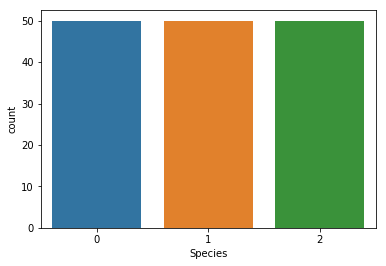

In [6]:
distribution = sn.countplot(x="Species", data=data)
plt.show(distribution)

## Missing Information

In [7]:
print(data.isnull().sum())

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


## Correlation Analysis

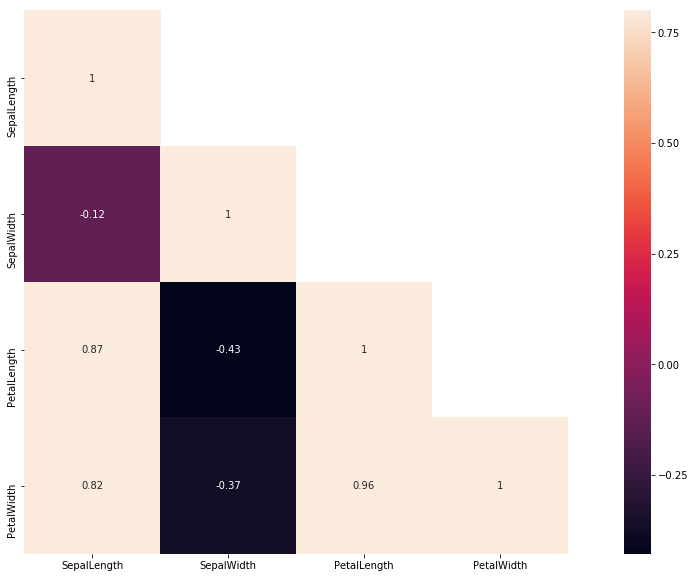

In [8]:
corrMatt = data[["SepalLength","SepalWidth","PetalLength","PetalWidth","Species"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## Split Data to Test and Train

In [9]:
output_data = data["Species"]
input_data = data.drop("Species",axis=1)
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3, random_state=42)

y_train = utils.to_categorical(y_train) 
y_test = utils.to_categorical(y_test)

print("Input training size: ", X_train.shape[0])
print("Output training size: ", y_train.shape[0])
print("Input testing size: ", X_test.shape[0])
print("Output testing size: ", y_test.shape[0])

Input training size:  105
Output training size:  105
Input testing size:  45
Output testing size:  45


In [10]:
X_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


## Creating & compiling a model

In [0]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training a model

In [17]:
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
105/105 [==============================] - 0s 918us/sample - loss: 1.5410 - accuracy: 0.3524
Epoch 2/50
105/105 [==============================] - 0s 189us/sample - loss: 1.3181 - accuracy: 0.3524
Epoch 3/50
105/105 [==============================] - 0s 189us/sample - loss: 1.1585 - accuracy: 0.3524
Epoch 4/50
105/105 [==============================] - 0s 174us/sample - loss: 1.0546 - accuracy: 0.3524
Epoch 5/50
105/105 [==============================] - 0s 188us/sample - loss: 0.9588 - accuracy: 0.5048
Epoch 6/50
105/105 [==============================] - 0s 193us/sample - loss: 0.9032 - accuracy: 0.6000
Epoch 7/50
105/105 [==============================] - 0s 171us/sample - loss: 0.8644 - accuracy: 0.6381
Epoch 8/50
105/105 [==============================] - 0s 176us/sample - loss: 0.8221 - accuracy: 0.8762
Epoch 9/50
105/105 [==============================] - 0s 173us/sample - loss: 0.7901 - accuracy: 0.8476
Epoch 10/50
105/105 [==============================] - 0s 168us/

## Evaluate the model

In [18]:
scores = model.evaluate(X_test, y_test)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

45/45 [==============================] - 0s 1ms/sample - loss: 0.2339 - accuracy: 1.0000

Accuracy: 100.00%


## Predict

In [19]:
prediction = model.predict(X_test)
prediction1 = pd.DataFrame({'IRIS1':prediction[:,0],'IRIS2':prediction[:,1], 'IRIS3':prediction[:,2]})
prediction1.round(decimals=4).head()

,IRIS1,IRIS2,IRIS3
0,0.0138,0.6664,0.3198
1,0.9706,0.0151,0.0143
2,0.0009,0.1287,0.8705
3,0.0165,0.5402,0.4433
4,0.0071,0.6841,0.3088


In [20]:
real_values = pd.DataFrame(y_test)
real_values.head()

,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
